### Tutorial showing how to read EBAS NASA Ames files

**Note**: this notebook is currently under development

Please see [here](https://ebas-submit.nilu.no/Submit-Data/Getting-started) for information related to the EBAS NASA Ames file format.

**Further links**:
 - [Pyaerocom website](http://aerocom.met.no/pyaerocom/)
 - [Pyaerocom installation instructions](http://aerocom.met.no/pyaerocom/readme.html#installation)
 - [Getting started](http://aerocom.met.no/pyaerocom/notebooks.html#getting-started)

In [1]:
import os 
from pyaerocom.io import EbasNasaAmesFile

ebasdir = "/lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/EBASMultiColumn/data/data/"
filename = "DE0043G.20080101000000.20160708144500.nephelometer..aerosol.1y.1h.DE09L_tsi_neph_3563.DE09L_nephelometer.lev2.nas"

mc = EbasNasaAmesFile(file=ebasdir+filename,
                      only_head=False,          #set True if you only want to import header
                      replace_invalid_nan=True, #replace invalid values with NaNs
                      convert_timestamps=True,  #compute datetime64 timestamps from numerical values
                      decode_flags=True,        #decode all flags (e.g. 0.111222333 -> 111 222 333)
                      verbose=False)
print(mc)

Init data paths for lustre


0.005696773529052734 s


Pyaerocom EbasNasaAmesFile
--------------------------

   num_head_lines: 60
   num_head_fmt: 1001
   data_originator: Flentje, Harald
   sponsor_organisation: DE09L, Deutscher Wetterdienst, DWD, Met. Obs., Hohenspeissenberg, , 82283, Hohenspeissenberg, Germany
   submitter: Flentje, Harald
   project_association: EUSAAR GAW-WDCA
   vol_num: 1
   vol_totnum: 1
   ref_date: 2008-01-01T00:00:00
   revision_date: 2016-07-08T00:00:00
   freq: 0.041667
   descr_time_unit: days from file reference point
   num_cols_dependent: 11
   mul_factors (list, 11 items)
   [1.0
    1.0
    ...
    1.0
    1.0]

   vals_invalid (list, 11 items)
   [999.999999
    999.999
    ...
    9999.9
    9.999999999]

   descr_first_col: end_time of measurement, days from the file reference point

   Column variable definitions
   -------------------------------
   EbasColDef: name=starttime, unit=days, is_var=False, is_flag=False, flag_id=, 
   EbasColDef: name=endtime, unit=days, is_var=False, is_flag=False, fl

#### Column information

In [2]:
mc.print_col_info()

Column 0
Pyaerocom EbasColDef
--------------------
name: starttime
unit: days
is_var: False
is_flag: False
flag_id: 

Column 1
Pyaerocom EbasColDef
--------------------
name: endtime
unit: days
is_var: False
is_flag: False
flag_id: 

Column 2
Pyaerocom EbasColDef
--------------------
name: aerosol_light_backscattering_coefficient
unit: 1/Mm
is_var: True
is_flag: False
flag_id: numflag
wavelength: 450.0 nm

Column 3
Pyaerocom EbasColDef
--------------------
name: aerosol_light_backscattering_coefficient
unit: 1/Mm
is_var: True
is_flag: False
flag_id: numflag
wavelength: 550.0 nm

Column 4
Pyaerocom EbasColDef
--------------------
name: aerosol_light_backscattering_coefficient
unit: 1/Mm
is_var: True
is_flag: False
flag_id: numflag
wavelength: 700.0 nm

Column 5
Pyaerocom EbasColDef
--------------------
name: aerosol_light_scattering_coefficient
unit: 1/Mm
is_var: True
is_flag: False
flag_id: numflag
wavelength: 450.0 nm

Column 6
Pyaerocom EbasColDef
--------------------
name: aerosol_l

You can see that all variable columns were assigned the same flag column, since there is only one. This would be different if there were multiple flag columns (e.g. one for each variable).

#### Access flag information

You can access the flags for each column using the ``flags`` attribute of the file.

In [3]:
mc.flags

OrderedDict([('numflag',
              <pyaerocom.io.ebas_nasa_ames.EbasFlagCol at 0x7f5f51df9a20>)])

In [4]:
flagcol = mc.flags["numflag"]

The raw flags can be accessed via:

In [5]:
flagcol.raw_data

array([0.394999, 0.394999, 0.394999, ..., 0.247   , 0.247   , 0.      ])

And the processed flags are in stored in a (Nx3) numpy array where N is the total number of timestamps.

In [6]:
flagcol.flags

array([[394, 999,   0],
       [394, 999,   0],
       [394, 999,   0],
       ...,
       [247,   0,   0],
       [247,   0,   0],
       [  0,   0,   0]])

For instance, access the flags of the 5 timestamp:

In [7]:
flagcol.flags[4]

array([394, 999,   0])

#### Convert object to pandas Dataframe

The conversion does currently exclude all flag columns

In [8]:
df = mc.to_dataframe()
df.head()

,starttime_days,endtime_days,aerosol_light_backscattering_coefficient_1/Mm_450.0nm,aerosol_light_backscattering_coefficient_1/Mm_550.0nm,aerosol_light_backscattering_coefficient_1/Mm_700.0nm,aerosol_light_scattering_coefficient_1/Mm_450.0nm,aerosol_light_scattering_coefficient_1/Mm_550.0nm,aerosol_light_scattering_coefficient_1/Mm_700.0nm,pressure_hPa,relative_humidity_%,temperature_K,numflag_no unit
2008-01-01 00:30:00,0.000000,0.041667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.394999
2008-01-01 01:29:59,0.041667,0.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.394999
2008-01-01 02:29:59,0.083333,0.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.394999
2008-01-01 03:30:00,0.125000,0.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.394999
2008-01-01 04:29:59,0.166667,0.208333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.394999


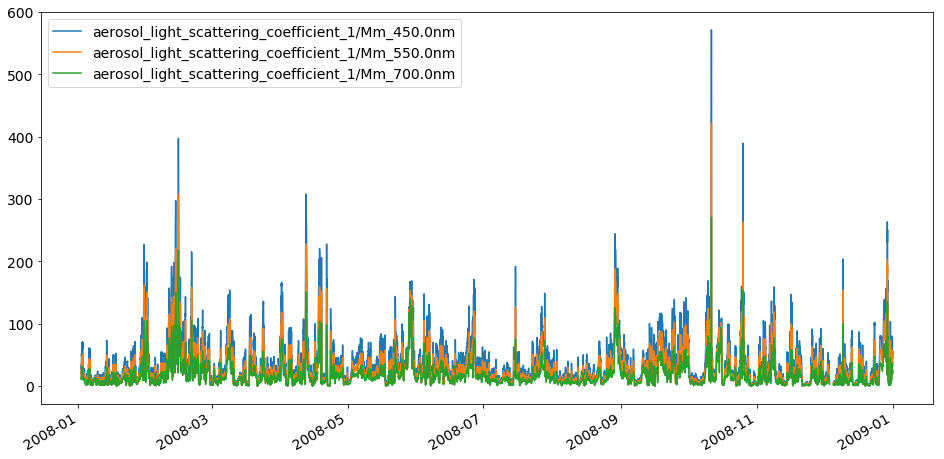

In [9]:
mc.to_dataframe('aerosol_light_scattering_coefficient', statistics='arithmetic mean').plot(figsize=(16,8))